#### Enrico Julian U. Absin
#### CS 3101N
## Spectral Theory

### Assignment 1

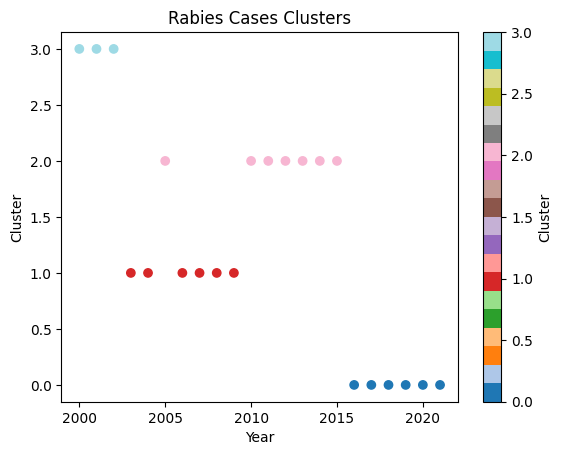

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("rabies-by-domestication.csv")
data = pd.read_csv("rabies-by-domestication.csv", thousands=",") # For the commas

# Select the columns from the dataset
features = ["Year", "Domestic", "Wild"]  # Adjust based on available data

# Perform clustering
clustering = KMeans(n_clusters=4, n_init=10)  # Adjust the number of clusters as needed
labels = clustering.fit_predict(data[features])

# Analyze and interpret clusters
data["Cluster"] = labels

# Explore results
data.groupby("Cluster").describe()  # Summarize data in each cluster
data.groupby(["Cluster", "Domestic", "Wild"]).size()  # Distribution of domestic/wild in each cluster


plt.scatter(data["Year"], data["Cluster"], c=labels, cmap="tab20")
plt.xlabel("Year")
plt.ylabel("Cluster")
plt.title("Rabies Cases Clusters")
plt.colorbar(label="Cluster")
plt.show()



**CONCLUSION:**<br>
By focusing on the years and analyzing its distribution within the data and across clusters, we can gain insights into the trend of the declinine in cases through the years. This is most likely due to our advancement in medicine and technology.

### Eigenvector Centrality Assignment 1
Given the following graph below, find its eigenvector centrality:

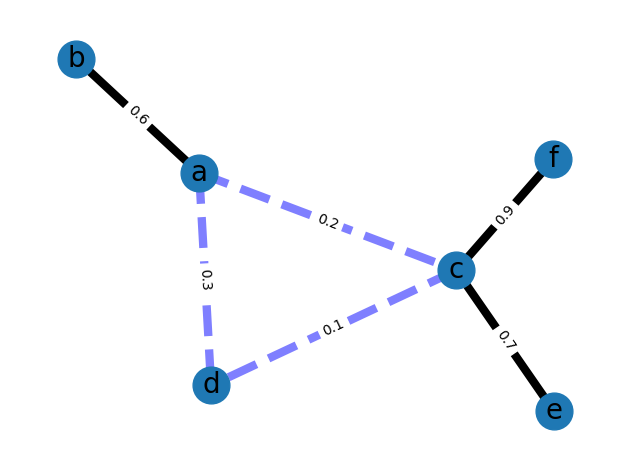

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

### Solution:

In [36]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

### Assignment 2

Nodes by Eigenvector Centrality: [Redditor(name='Sweepd'), Redditor(name='seedotlover'), Redditor(name='inshane_in_the_brain'), Redditor(name='HeyThatsHawk'), Redditor(name='DBrugs')]


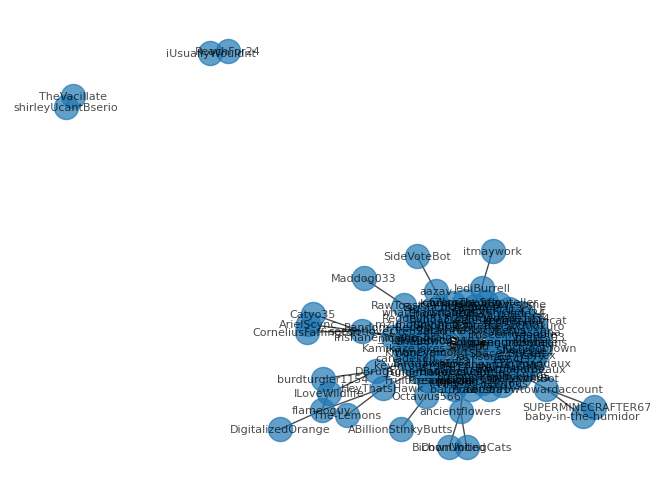

In [16]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id = "5SoQTA1pxiF_F08SD1xn2A",
    client_secret = "3Xim9s82ig4rRp2izpboKXLfLA3luQ",
    user_agent = "No_Cartographer_9265",
)

subreddit_name = "GarlicBreadMemes"
subreddit = reddit.subreddit(subreddit_name)

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue

        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Nodes by Eigenvector Centrality:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

post_id = get_top_post_id(subreddit)

social_network = create_social_network(post_id)

perform_social_network_analysis(social_network)

visualize_network(social_network)

**Hypothesis:** In a social network analysis of Reddit's top post comments, elevated eigenvector centrality values indicate nodes representing users who connect people most through replies and interaction.
<br><br>
**Conclusion:** To conclude this analysis, the reddit users with the highest eigenvector centrality in order are: Sweepd, seedotlover, inshane_in_the_brain, HeyThatsHawk, DBrugs. They make up only a few of the nodes that play a vital role in a subreddit that connects different people through humor about Garlic Bread of all things.